In [1]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt  
import copy
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [44]:
column_names = ['id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'type']
train_data = pd.read_csv('4_data.csv', names=column_names, delim_whitespace=True, header=None)
# print(train_data.head())
y_train = train_data['RI'][1:].values
x_train = train_data['Al'][1:].values
x_train=x_train.astype(float)
y_train=y_train.astype(float)
print(x_train[0:5])
print(y_train[0:5])

[1.1  1.36 1.54 1.29 1.24]
[ 3.01 -0.39 -1.82 -0.34 -0.58]


/var/folders/hz/gjlv0lbd4ds7shs1th30424c0000gp/T/ipykernel_97253/4221147532.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_data = pd.read_csv('4_data.csv', names=column_names, delim_whitespace=True, header=None)


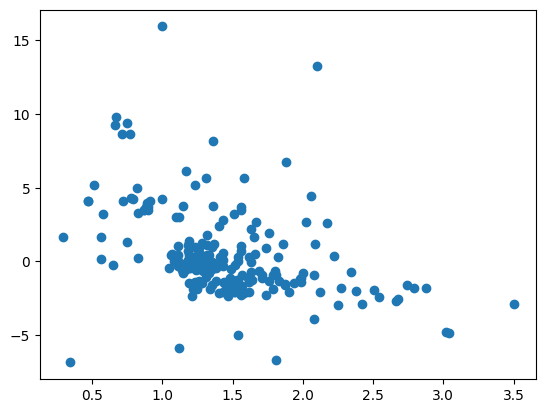

In [45]:
plt.scatter(x_train,y_train)
plt.show()

In [46]:
class Nadaraya_watson_kernel_guassian():
    def __init__(self,bandwidth=1.0):
        self.bandwidth=bandwidth
        self.x_data=None
        self.y_data=None
    def fit(self,x,y):
        self.x_data=x
        self.y_data=y
    def gaussian_kernel(self,x):
        ## (1/2*pi) e^{-x^2 / 2}
        exponent=np.exp(-0.5 * (x**2))
        result=exponent/np.sqrt(2*np.pi)
        return result
    def predict(self, x):
        temp = (x - self.x_data) / self.bandwidth
        ker = self.gaussian_kernel(temp)
        num = np.sum(ker * self.y_data)
        den = np.sum(ker)
        return num / den    
    def risk_function(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)
    def k_fold_risk(self, X, Y, k=5):
            kf = KFold(n_splits=k)
            total_risk = 0

            for train_index, test_index in kf.split(X):
                X_train, X_test = X[train_index], X[test_index]
                Y_train, Y_test = Y[train_index], Y[test_index]
                self.fit(X_train, Y_train)
                Y_pred = np.array([self.predict(x) for x in X_test])
                fold_risk = self.risk_function(Y_pred, Y_test)
                total_risk += fold_risk
            return total_risk / k

In [47]:
kde=Nadaraya_watson_kernel_guassian(bandwidth=0.04)
kde.fit(x_train,y_train)

In [48]:
x_min,x_max=x.min(),x.max()
x_range=np.linspace(x_min,x_max,1000)

In [49]:
print(y_train[0:5])

[ 3.01 -0.39 -1.82 -0.34 -0.58]


/var/folders/hz/gjlv0lbd4ds7shs1th30424c0000gp/T/ipykernel_97253/3821726345.py:19: RuntimeWarning: invalid value encountered in scalar divide
  return num / den


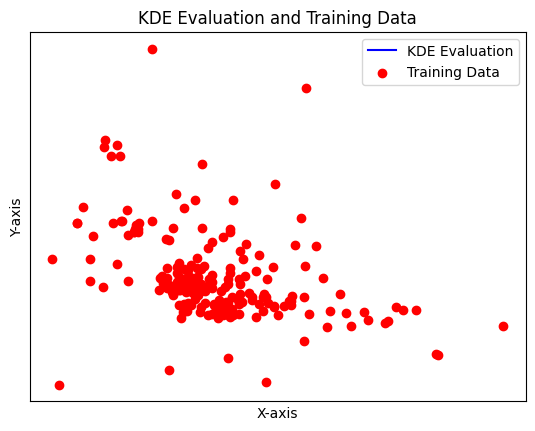

In [50]:
eval = []
for i in x_range:
    x = kde.predict(i)
    eval.append(x)
plt.plot(x_range, eval, label='KDE Evaluation', color='blue')
plt.scatter(x_train, y_train, label='Training Data', color='red')
plt.xticks([])  # Rotate the x-axis labels if needed, or you can remove this line
plt.yticks([])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('KDE Evaluation and Training Data')
plt.legend(loc='upper right')
plt.show()

In [51]:
print(np.max(eval))

nan


In [52]:
x_train_h, x_test_h, y_train_h, y_test_h = train_test_split(x_train, y_train, test_size=0.1, random_state=0)

/var/folders/hz/gjlv0lbd4ds7shs1th30424c0000gp/T/ipykernel_97253/3821726345.py:15: RuntimeWarning: divide by zero encountered in divide
  temp = (x - self.x_data) / self.bandwidth
/var/folders/hz/gjlv0lbd4ds7shs1th30424c0000gp/T/ipykernel_97253/3821726345.py:19: RuntimeWarning: invalid value encountered in scalar divide
  return num / den
/var/folders/hz/gjlv0lbd4ds7shs1th30424c0000gp/T/ipykernel_97253/3821726345.py:15: RuntimeWarning: invalid value encountered in divide
  temp = (x - self.x_data) / self.bandwidth


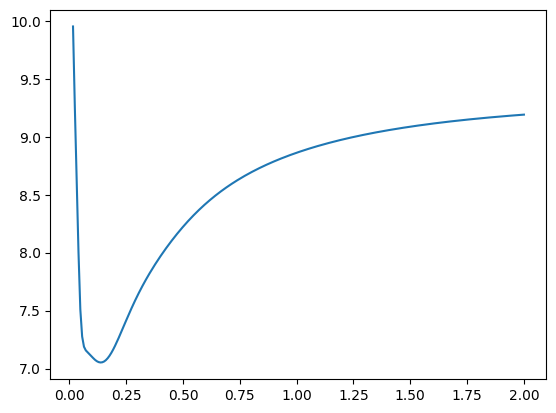

In [53]:
h_x=np.linspace(0,2,250)
risk=[]
for i in h_x:
    a=Nadaraya_watson_kernel_guassian(i)
    risk.append(a.k_fold_risk(x_train_h, y_train_h, k=5))
plt.plot(h_x,risk)

In [54]:
risk=np.array(risk)
risk_witout_nan=risk[~np.isnan(risk)]
print(risk_witout_nan.min())
index = np.where(risk== risk_witout_nan.min())[0][0]
print(index)
h=h_x[index]
print(h)

7.05281342078675
17
0.1365461847389558


/var/folders/hz/gjlv0lbd4ds7shs1th30424c0000gp/T/ipykernel_97253/3821726345.py:15: RuntimeWarning: divide by zero encountered in divide
  temp = (x - self.x_data) / self.bandwidth
/var/folders/hz/gjlv0lbd4ds7shs1th30424c0000gp/T/ipykernel_97253/3821726345.py:19: RuntimeWarning: invalid value encountered in scalar divide
  return num / den
/var/folders/hz/gjlv0lbd4ds7shs1th30424c0000gp/T/ipykernel_97253/3821726345.py:15: RuntimeWarning: invalid value encountered in divide
  temp = (x - self.x_data) / self.bandwidth


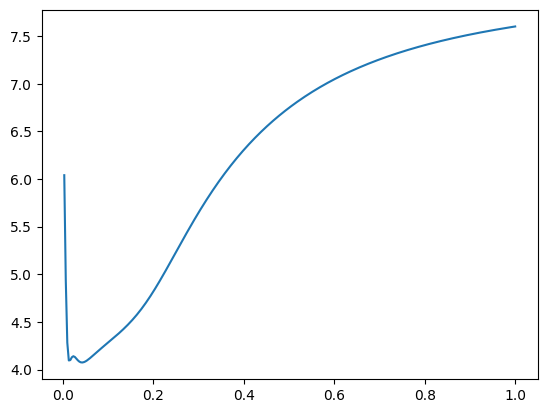

In [55]:
h_x=np.linspace(0,1,300)
risk=[]
for i in h_x:
    a=Nadaraya_watson_kernel_guassian(i)
    a.fit(x_train_h,y_train_h)
    pred=[]
    for j in range(len(x_test_h)):
        temp=a.predict(x_test_h[j])
        pred.append(temp)
    risk.append(a.risk_function(pred,y_test_h))
plt.plot(h_x,risk)

In [56]:
risk=np.array(risk)
risk_witout_nan=risk[~np.isnan(risk)]
print(risk_witout_nan.min())
index = np.where(risk== risk_witout_nan.min())[0][0]
print(index)
h=h_x[index]
print(h)

4.075268003327183
13
0.043478260869565216
